# Dataset Loading from previous stage

### Constants

In [ ]:
data_read_path = '/content/drive/MyDrive/CombinedData.csv'
data_clean_path='/content/drive/MyDrive/CombinedDataCleaned.csv'
data_nlped_path='/content/drive/MyDrive/CombinedDataNLPed.csv'


## Import Libraries
---
lets start by importing the nessacary libraries

#### insatll stanza

In [ ]:
pip install contractions

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.7/110.7 kB 1.5 MB/s eta 0:00:00


In [ ]:
pip install stanza

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 13.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 586.9/586.9 kB 28.5 MB/s eta 0:00:00


### import

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from nltk.corpus import stopwords
from imblearn.over_sampling import SMOTE
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack
import emoji
from sklearn.metrics import make_scorer, recall_score, precision_score
import contractions
import re
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest, mutual_info_classif ,chi2
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import random
#from imblearn.over_sampling import RandomOverSampler
from scipy.sparse import hstack  # To combine sparse matrices
from wordcloud import WordCloud
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import BatchNormalization
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from tensorflow.keras.regularizers import l2

from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from google.colab import drive
from textblob import TextBlob


import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

import stanza
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import warnings
warnings.filterwarnings("ignore")

In [ ]:
import tensorflow as tf

# Check if GPU is available
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))


Num GPUs Available:  0


### Download packages

In [ ]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('averaged_perceptron_tagger_eng')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.


True

## Loading the dataset

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv(data_nlped_path)

In [ ]:
df.fillna("", inplace=True)

In [ ]:
df.head(3)

,statement,status,statemnent_length,num_of_words,num_of_sentences,statement_with_emojis,tokens,tokens_stemmed,tokens_verbs,tokens_nouns,tokens_adj,important_words
0,oh my gosh,Anxiety,10,3,1,oh my gosh,"['oh', 'my', 'gosh']",oh my gosh,,gosh,,gosh my oh
1,trouble sleeping confused mind restless heart ...,Anxiety,64,10,2,trouble sleeping confused mind restless heart ...,"['trouble', 'sleeping', 'confused', 'mind', 'r...",troubl sleep confus mind restless heart all ou...,sleeping confused,trouble mind heart tune,restless,out mind all tune sleeping confused restless h...
2,all wrong back off dear forward doubt stay in ...,Anxiety,78,14,2,all wrong back off dear forward doubt stay in ...,"['all', 'wrong', 'back', 'off', 'dear', 'forwa...",all wrong back off dear forward doubt stay in ...,,dear doubt stay restless place,wrong restless,wrong all place stay doubt dear a restless off...


In [ ]:
df.shape

(52681, 12)

# ***Vectorizing using TF-IDF***

## About VEctorizing Approach

**What is the TF (Term of Frequency) and IDF (Inverse Document Frequency)?**

---
```


```
---

* **What is TF-IDF?**

TF-IDF (Term Frequency-Inverse Document Frequency) is a numerical statistic used to evaluate the importance of a word in a document relative to a collection of documents, typically in the context of text mining and Natural Language Processing (NLP). It is commonly used as a feature extraction method to convert textual data into numerical features that machine learning models can process.

* The TF-IDF measure combines two components:

  1. **Term Frequency (TF):**

  **Definition:** The number of times a word (term) appears in a document, divided by the total number of words in that document. It gives us a sense of how important a word is within a single document.

  **Formula:**

   \begin{align}
   \text{TF}(t, d) = \frac{\text{Number of times term } t \text{ appears in document } d}{\text{Total number of terms in document } d}
   \end{align}

  
  2. **Inverse Document Frequency (IDF):**
  
    **Definition:** The logarithm of the total number of documents in the corpus divided by the number of documents containing the term.
  
    It measures how important a word is across the whole corpus. Common words that appear in many documents (like "the," "is") have low IDF values because they are less informative, while rare terms have higher IDF values.

    **Formula:**



  \begin{align}
   \text{IDF}(t, D) = \log \left( \frac{\text{Total number of documents in the corpus}}{1 + \text{Number of documents containing the term } t} \right)
 \end{align}

3. **TF-IDF:**

  **Definition:** The product of the term frequency (TF) and inverse document frequency (IDF) for a term in a document. It reflects both the term's frequency within a specific document and how unique or important the term is across the entire document corpus.
  
  **Formula:**

   \begin{align}
   \text{TF-IDF}(t, d, D) = \text{TF}(t, d) \times \text{IDF}(t, D)
   \end{align}

  In these formulas:
  - \( t \) refers to a term (word),
  - \( d \) refers to a document,
  - \( D \) refers to the entire corpus (collection of documents),
  - \( \log \) is the logarithm function, typically base 10 or natural logarithm.


* **How TF-IDF is Useful**
  **Feature Extraction in NLP:** TF-IDF helps convert raw text data into a matrix of numerical features, making the data suitable for machine learning models. Each document is represented as a vector of TF-IDF values, where each value corresponds to the importance of a word in that document. This is a common technique in text classification tasks, such as sentiment analysis, spam detection, and topic classification.

  **Captures the Importance of Words:** By using TF-IDF, we can ignore frequently occurring but uninformative words (e.g., "the", "and") and focus on more meaningful terms that are key to the context of a document. This helps improve the accuracy and relevance of the model's predictions by emphasizing words that differentiate one document from another.

  **Reduces Noise in Text:** TF-IDF reduces the weight of very common words across all documents, as they are often not useful for distinguishing between documents. It assigns higher importance to rare and meaningful terms, which tend to carry more information about the content of the document.

  **Improves Text Similarity Measures:** TF-IDF vectors are often used to calculate the similarity between documents (e.g., using cosine similarity). This is useful in tasks like document clustering, search engines, and recommendation systems.

  
* **Use Case in Mental Health Sentiment Analysis**

  In our dataset, which contains mental health-related statements, applying TF-IDF can help the model understand which words are most significant for predicting the mental health status of a given statement. For example:

    - Words like "hopeless," "depressed," and "suicidal" may have high TF-IDF scores in documents labeled with "Depression" or "Suicidal" mental health statuses, but these words may be rare across other categories.
  
   - Common words like "I," "the," and "is" will have low IDF values since they appear in many documents, making them less useful for classification.

  By transforming the text data into TF-IDF vectors, you provide a more informative and compact representation of the statements, which can lead to better performance of machine learning models.



---
```









```
---

## Initialize separate TF-IDF Vectorizer


Initialize separate TF-IDF Vectorizer for verbs and nouns and adj , stemm


In [ ]:
vectorizer_emojis = TfidfVectorizer(max_features=100, stop_words='english')

vectorizer_imp = TfidfVectorizer(ngram_range=(1, 2), max_features=10000, stop_words='english')

vectorizer_stemmes = TfidfVectorizer(ngram_range=(1, 2), max_features=2000, stop_words='english')

vectorizer_verbs = TfidfVectorizer(ngram_range=(1, 2), max_features=1000, stop_words='english')

vectorizer_nouns = TfidfVectorizer(ngram_range=(1, 2), max_features=1000, stop_words='english')

vectorizer_adjectives = TfidfVectorizer(ngram_range=(1, 2), max_features=1000, stop_words='english')


## Extract Verb, Nouuns , ... Vectors

### importtant word

In [ ]:

X_imp_tfidf = vectorizer_emojis.fit_transform(df['important_words'])


### Emojies

In [ ]:
# Emojis
X_emojis_tfidf = vectorizer_emojis.fit_transform(df['statement_with_emojis'])

### stemmes

In [ ]:
# Adjectives
X_stemm_tfidf = vectorizer_stemmes.fit_transform(df['tokens_stemmed'].astype(str))


### verbs

In [ ]:
# Verbs
X_verbs_tfidf = vectorizer_verbs.fit_transform(df['tokens_verbs'].astype(str))

### nouns

In [ ]:
# Nouns
X_nouns_tfidf = vectorizer_nouns.fit_transform(df['tokens_nouns'].astype(str))

### Adjectives

In [ ]:
# Adjectives

X_adjectives_tfidf = vectorizer_adjectives.fit_transform(df['tokens_adj'].astype(str))


## comdine Vectors

In [ ]:


# Combine all TF-IDF features into one matrix
# X_combined_tfidf = hstack([2*X_verbs_tfidf, X_nouns_tfidf, 0.5 * X_adjectives_tfidf, 0.5*X_emojis_tfidf,2*X_stemm_tfidf])
#0.8*X_verbs_tfidf, 1.2*X_nouns_tfidf,
X_combined_tfidf = hstack([X_imp_tfidf,X_stemm_tfidf])
print("Total number of combined features:", X_combined_tfidf.shape[1])


Total number of combined features: 2100


# ***Feature Selection***

### Spliting

In [ ]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_combined_tfidf, df['status'], test_size=0.2, random_state=42)

### Select K Best

In [ ]:
# Arrays to store results
feature_counts = []
train_accuracies = []
test_accuracies = []

# Iterate over different values of k
for k in range(100, X_train.shape[1], 100):
    # Select top k features using mutual information as the score function
    selector = SelectKBest(score_func=chi2, k=k)

    # Fit and transform the training set
    X_train_selected = selector.fit_transform(X_train, y_train)
    X_test_selected = selector.transform(X_test)

    # Train a logistic regression model
    model = LogisticRegression(max_iter=600, random_state=42)
    model.fit(X_train_selected, y_train)

    # Record the number of features and accuracies
    feature_counts.append(k)
    train_accuracies.append(accuracy_score(y_train, model.predict(X_train_selected)))
    test_accuracies.append(accuracy_score(y_test, model.predict(X_test_selected)))


### Plot

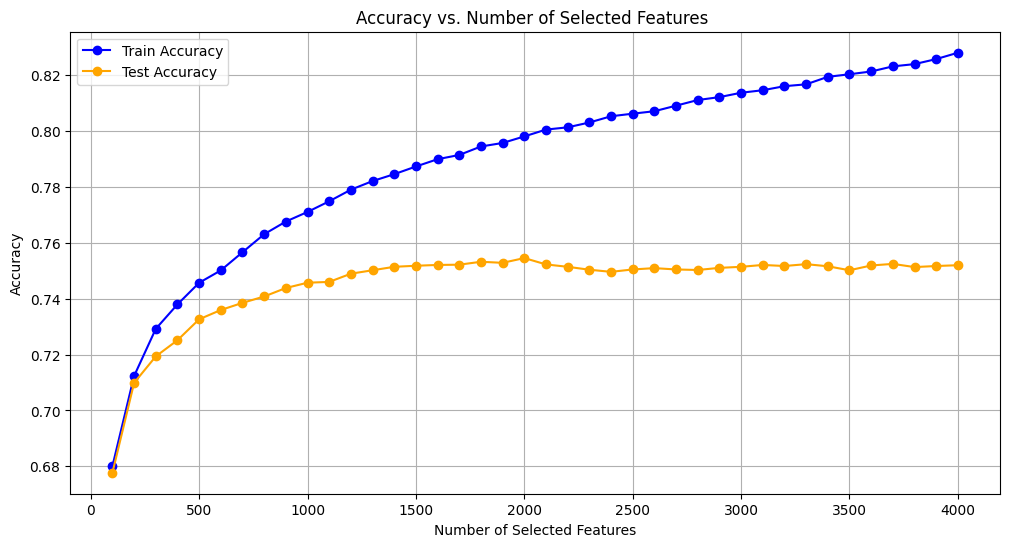

In [ ]:
# Plot the accuracy vs. number of features
plt.figure(figsize=(12, 6))
plt.plot(feature_counts, train_accuracies, label="Train Accuracy", marker="o", color="blue")
plt.plot(feature_counts, test_accuracies, label="Test Accuracy", marker="o", color="orange")
plt.xlabel("Number of Selected Features")
plt.ylabel("Accuracy")
plt.title("Accuracy vs. Number of Selected Features ")
plt.legend()
plt.grid()
plt.show()


# ***Dataset Spliting, Encoding and Staging***

In [ ]:
selector = SelectKBest(score_func=chi2, k=2000)

X_test.shape

(10537, 2100)

In [ ]:
    # Fit and transform the training set
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

In [ ]:
# Split the vectorized data into train and test sets
#X_train_full, X_test, y_train_full, y_test = train_test_split(X_combined_tfidf, df['status'], test_size=0.2, random_state=42)
X_train_full, X_test, y_train_full, y_test =X_train_selected, X_test_selected, y_train , y_test

### Encode LAbles and slpit status

#### Encode LAbles

In [ ]:
# Encode labels for binary classification (Stage 1)
binary_encoder = LabelEncoder()
y_train_full_binary = binary_encoder.fit_transform(y_train_full.apply(lambda x: 'Normal' if x == 'Normal' else 'Non-Normal'))
y_test_binary = binary_encoder.transform(y_test.apply(lambda x: 'Normal' if x == 'Normal' else 'Non-Normal'))

# Encode labels for multi-class classification (Stage 2)
multi_encoder = LabelEncoder()
y_train_full_multi = multi_encoder.fit_transform(y_train_full[y_train_full != 'Normal'])  # Only for "Non-Normal" classes
y_test_multi = multi_encoder.transform(y_test[y_test != 'Normal'])  # Only for "Non-Normal" classes


#### split to Stages

In [ ]:
# Split train data for Stage 1 and Stage 2
X_train_tfidf_stage1 = X_train_full
X_train_tfidf_stage2 = X_train_full[y_train_full != 'Normal']
y_train_tfidf_stage1 = y_train_full_binary
y_train_tfidf_stage2 = y_train_full_multi

X_test_tfidf_stage1 = X_test
X_test_tfidf_stage2 = X_test[y_test != 'Normal']



### OverSampling using SMOTE  

In [ ]:

# Apply SMOTE for oversampling on Stage 2
smote = SMOTE(random_state=42)

#X_train_tfidf_stage2, y_train_stage2 = smote.fit_resample(X_train_tfidf_stage2, y_train_tfidf_stage2)
#X_train_tfidf_stage1, y_train_stage1 = smote.fit_resample(X_train_tfidf_stage1, y_train_tfidf_stage1)



# ***Normal Statement Classification***

### What we will do


>  Stage 1

>  1.1  Logistic regression classifier

>  2.2 neural network classifier

>  2.3 chosssing the best classifier


##  1.1 Stage 1: SVM

### Grid Search Param Definie

#### Logistic Regression Param

In [ ]:
# Define the binary classifier
#clf = LogisticRegression(max_iter=1000, random_state=42)

# Define the parameter grid for GridSearchCV
# param_grid = {
#     'C': [0.01, 0.1, 0.8,1,2, 10, 100],  # Regularization strength
#     'solver': ['lbfgs', 'liblinear'],  # Optimization algorithms
#     'penalty': ['l2'],  # Regularization type
# }


#### SVM Params

In [ ]:
# Define the SVC classifier
clf = SVC(random_state=42)

# Define the parameter grid to search over
param_grid = {
    'C': [0.6,],  # Regularization strength
    'kernel': ['linear'],  # Types of kernels
    'gamma': ['auto'],  # Kernel coefficient
}



### Define Recall Scorer

In [ ]:
# Define recall as the scorer
recall_scorer = make_scorer(recall_score, average='weighted')

In [ ]:
# Define recall as the scorer
precision_scorer = make_scorer(precision_score)

###  Grid Search Fit

In [ ]:
# Perform Grid Search with cross-validation
grid_search = GridSearchCV(clf, param_grid, scoring=recall_scorer, cv=5, n_jobs=-1)

In [ ]:

# Fit the model using GridSearchCV
grid_search.fit(X_train_tfidf_stage1, y_train_tfidf_stage1)

GridSearchCV(cv=5, estimator=SVC(random_state=42), n_jobs=-1,
             param_grid={'C': [0.6], 'gamma': ['auto'], 'kernel': ['linear']},
             scoring=make_scorer(recall_score, response_method='predict', average=weighted))

### best PArarms

In [ ]:
# Best parameters from GridSearchCV
best_params = grid_search.best_params_
print(f"Best parameters: {best_params}")



Best parameters: {'C': 0.6, 'gamma': 'auto', 'kernel': 'linear'}


In [ ]:
# Get the best model
logistic1_classifier = grid_search.best_estimator_


In [ ]:
# Get the best parameters and accuracy
best_accuracy = grid_search.best_score_
print(f"Best accuracy: {best_accuracy}")

Best accuracy: 0.940157474396116


### Evalutate the model

In [ ]:

# Evaluate the model on the test set
y_pred = logistic1_classifier.predict(X_test_tfidf_stage1)
print("Test set recall score:", recall_score(y_test_binary, y_pred, average='weighted'))


Test set recall score: 0.9388820347347442


### classification report for train

In [ ]:
# Evaluate binary classifier
y_pred_stage1 = logistic1_classifier.predict(X_train_tfidf_stage1)
print("Stage 1 (Binary Classification) - Normal vs Non-Normal")
print("Accuracy:", accuracy_score(y_train_tfidf_stage1, y_pred_stage1))
print(classification_report(y_train_tfidf_stage1, y_pred_stage1))
print("Confusion Matrix:\n", confusion_matrix(y_train_tfidf_stage1, y_pred_stage1))


Stage 1 (Binary Classification) - Normal vs Non-Normal
Accuracy: 0.9512148823082763
              precision    recall  f1-score   support

           0       0.97      0.96      0.96     29109
           1       0.92      0.92      0.92     13035

    accuracy                           0.95     42144
   macro avg       0.94      0.94      0.94     42144
weighted avg       0.95      0.95      0.95     42144

Confusion Matrix:
 [[28062  1047]
 [ 1009 12026]]


### classification report

In [ ]:
# Evaluate binary classifier
y_pred_stage1 = logistic1_classifier.predict(X_test_tfidf_stage1)
print("Stage 1 (Binary Classification) - Normal vs Non-Normal")
print("Accuracy:", accuracy_score(y_test_binary, y_pred_stage1))
print(classification_report(y_test_binary, y_pred_stage1))
print("Confusion Matrix:\n", confusion_matrix(y_test_binary, y_pred_stage1))


Stage 1 (Binary Classification) - Normal vs Non-Normal
Accuracy: 0.9388820347347442
              precision    recall  f1-score   support

           0       0.95      0.96      0.96      7229
           1       0.90      0.90      0.90      3308

    accuracy                           0.94     10537
   macro avg       0.93      0.93      0.93     10537
weighted avg       0.94      0.94      0.94     10537

Confusion Matrix:
 [[6915  314]
 [ 330 2978]]


### Heat Map

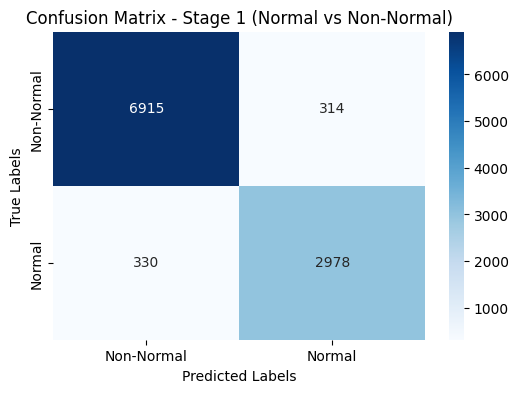

In [ ]:
# Calculate confusion matrix for Stage 1
conf_matrix_stage1 = confusion_matrix(y_test_binary, y_pred_stage1)

# Plot heatmap for Stage 1
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_stage1, annot=True, fmt="d", cmap="Blues", xticklabels=binary_encoder.classes_, yticklabels=binary_encoder.classes_)
plt.title("Confusion Matrix - Stage 1 (Normal vs Non-Normal)")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


## 1.2  Stage 1:  Neural Network

### Neural Network Layers

In [ ]:
# Define the layers in an array
layers = [
    Dense(units=256, activation='relu', input_shape=(X_train_tfidf_stage1.shape[1],),kernel_regularizer=l2(0.01)),  # Input Layer
    BatchNormalization(),
    Dropout(rate=0.2),  # Dropout Layer 1
    Dense(units=64, activation='relu',kernel_regularizer=l2(0.01)),  # Hidden Layer 1
    Dropout(rate=0.1),  # Dropout Layer 1
    Dense(units=16, activation='relu',kernel_regularizer=l2(0.01)),  # Hidden Layer 2

    Dense(units=2, activation='softmax')  # Output Layer
]

# Initialize the Sequential model
model = Sequential(layers)


# Compile the model: Using Adam optimizer, sparse categorical crossentropy loss, and accuracy as the metric
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])



### Model Training

In [ ]:

# Train the model on training data with validation on the test data
history = model.fit(X_train_tfidf_stage1.toarray(),
                    y_train_tfidf_stage1,
                    epochs=20,
                    batch_size=64,
                    validation_split=0.3
                    )


Epoch 1/20
461/461 ━━━━━━━━━━━━━━━━━━━━ 10s 18ms/step - accuracy: 0.8831 - loss: 2.2164 - val_accuracy: 0.8464 - val_loss: 0.5045
Epoch 2/20
461/461 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - accuracy: 0.9238 - loss: 0.3385 - val_accuracy: 0.9242 - val_loss: 0.2951
Epoch 3/20
461/461 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - accuracy: 0.9291 - loss: 0.2835 - val_accuracy: 0.9274 - val_loss: 0.2728
Epoch 4/20
461/461 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.9324 - loss: 0.2679 - val_accuracy: 0.9276 - val_loss: 0.2689
Epoch 5/20
461/461 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.9326 - loss: 0.2597 - val_accuracy: 0.9295 - val_loss: 0.2609
Epoch 6/20
461/461 ━━━━━━━━━━━━━━━━━━━━ 8s 17ms/step - accuracy: 0.9377 - loss: 0.2432 - val_accuracy: 0.9297 - val_loss: 0.2512
Epoch 7/20
461/461 ━━━━━━━━━━━━━━━━━━━━ 8s 12ms/step - accuracy: 0.9373 - loss: 0.2348 - val_accuracy: 0.9318 - val_loss: 0.2477
Epoch 8/20
461/461 ━━━━━━━━━━━━━━━━━━━━ 12s 16ms/step - accuracy: 0.9376 - loss: 0.2299 - val_

### Classification report on train

In [ ]:
# Evaluate binary classifier
y_pred_stage1 = model.predict(X_train_tfidf_stage1)
y_pred_stage1 = y_pred_stage1.argmax(axis=1)  # Convert probabilities to class predictions

print("Stage 1 (Binary Classification) - Normal vs Non-Normal")
print("Accuracy:", accuracy_score(y_train_tfidf_stage1, y_pred_stage1))
print(classification_report(y_train_tfidf_stage1, y_pred_stage1))
print("Confusion Matrix:\n", confusion_matrix(y_train_tfidf_stage1, y_pred_stage1))


1317/1317 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step
Stage 1 (Binary Classification) - Normal vs Non-Normal
Accuracy: 0.9479166666666666
              precision    recall  f1-score   support

           0       0.97      0.96      0.96     29109
           1       0.90      0.93      0.92     13035

    accuracy                           0.95     42144
   macro avg       0.94      0.94      0.94     42144
weighted avg       0.95      0.95      0.95     42144

Confusion Matrix:
 [[27813  1296]
 [  899 12136]]


### Confusion Matrix

In [ ]:

# Make predictions on the test set
y_pred_prob = model.predict(X_test_tfidf_stage1.toarray())
y_pred = y_pred_prob.argmax(axis=1)  # Convert probabilities to class predictions

# Calculate the accuracy
accuracy_nn = accuracy_score(y_test_binary,y_pred)
print("\n")
print("Accuracy:", accuracy_nn)

# Compute the confusion matrix

conf_matrix_nn = confusion_matrix(y_test_binary,y_pred)

# Print classification report
print("Confusion Matrix:\n",)
print( conf_matrix_nn)


330/330 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


Accuracy: 0.931099933567429
Confusion Matrix:

[[6814  415]
 [ 311 2997]]


In [ ]:
print(classification_report(y_test_binary, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95      7229
           1       0.88      0.91      0.89      3308

    accuracy                           0.93     10537
   macro avg       0.92      0.92      0.92     10537
weighted avg       0.93      0.93      0.93     10537



### Heat Map

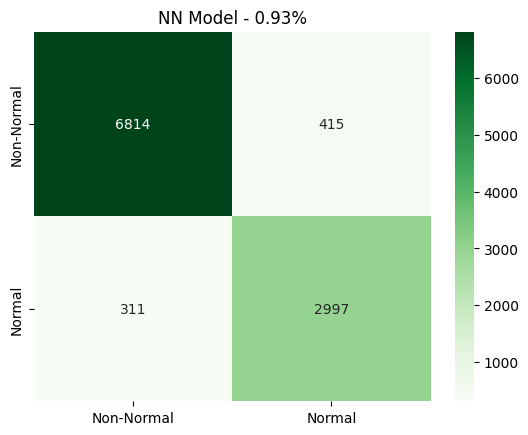

In [ ]:
ax = sns.heatmap(conf_matrix_nn, annot = True, fmt='d', cmap='Greens', xticklabels=binary_encoder.classes_, yticklabels=binary_encoder.classes_)
ax.set_title(f'NN Model - {accuracy_nn:.2}%')
plt.show()

### Model Loss and Accuracy

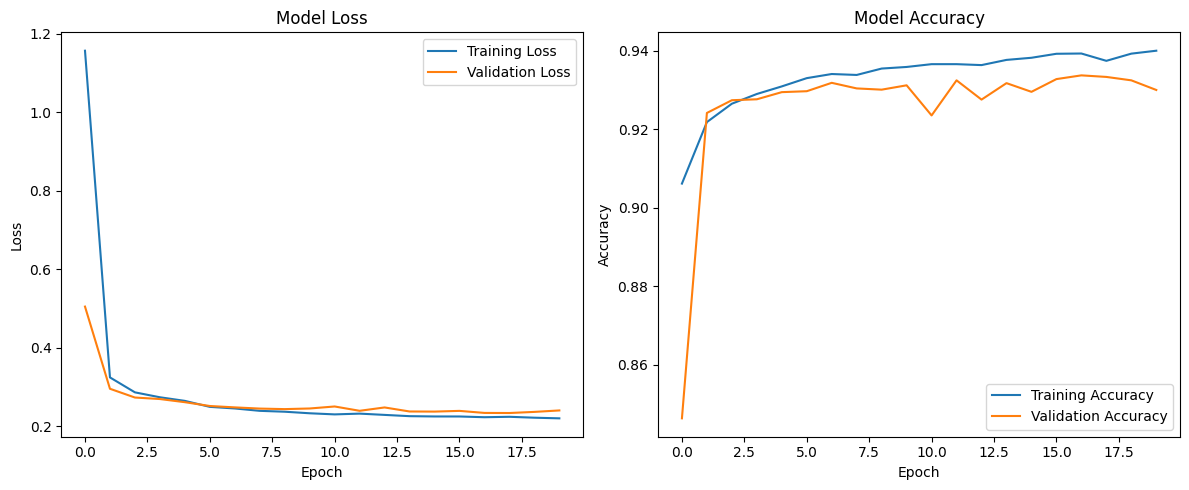

In [ ]:
plt.figure(figsize=(12, 5))

# Plot training & validation loss values
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

# Plot training & validation accuracy values
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

plt.tight_layout()  # Adjusts subplots to fit in the figure area.
plt.show()  # Display the plots

## 1.3 Best Classifier for  Stage 1

we chose the best classfier for this stage

In [ ]:
binary_classifier = logistic1_classifier

# ***Non Normal Statement Classification***

## 2.1 SVM Stage 2

### Grid Search Params

#### Logistic Params

In [ ]:
# Define the binary classifier
# clf = LogisticRegression(max_iter=1000, random_state=42)

# Define the parameter grid for GridSearchCV
# param_grid = {
#     'C': [ 0.03,0.01, 0.02],  # Regularization strength
#     'solver': ['lbfgs'],  # Optimization algorithms
#     'penalty': ['l2'],  # Regularization type
# }


#### SVM Params

In [ ]:
# Define the SVC classifier
clf = SVC(random_state=42)

# Define the parameter grid to search over
param_grid = {
    'C': [0.3,],  # Regularization strength
    'kernel': ['poly'],  # Types of kernels
    'gamma': ['auto'],  # Kernel coefficient
}



### Grid Search

In [ ]:
grid_search = GridSearchCV(clf, param_grid, scoring=precision_scorer, cv=5, n_jobs=-1)

### Train the Model

In [ ]:
# Fit the grid search on the training data
grid_search.fit(X_train_tfidf_stage2, y_train_tfidf_stage2)


GridSearchCV(cv=5, estimator=SVC(random_state=42), n_jobs=-1,
             param_grid={'C': [0.3], 'gamma': ['auto'], 'kernel': ['poly']},
             scoring=make_scorer(precision_score, response_method='predict'))

### Best Classifier

In [ ]:
# Get the best model and hyperparameters
best_clf = grid_search.best_estimator_
print("Best hyperparameters found: ", grid_search.best_params_)


Best hyperparameters found:  {'C': 0.3, 'gamma': 'auto', 'kernel': 'poly'}


In [ ]:
# Train multi-class classifier for Stage 2
logistic_classifier =best_clf
# logistic_classifier = SVC(random_state=42,kernel='linear',C=0.3)

# logistic_classifier.fit(X_train_tfidf_stage2, y_train_tfidf_stage2)


### Classification report on training

In [ ]:
# Evaluate binary classifier
y_pred_stage2 = logistic_classifier.predict(X_train_tfidf_stage2)
print("Stage 1 (Binary Classification) - Normal vs Non-Normal")
print("Accuracy:", accuracy_score(y_train_tfidf_stage2, y_pred_stage2))
print(classification_report(y_train_tfidf_stage2, y_pred_stage2))
print("Confusion Matrix:\n", confusion_matrix(y_pred_stage2,y_train_tfidf_stage2))


Stage 1 (Binary Classification) - Normal vs Non-Normal
Accuracy: 0.42557284688584285
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      3086
           1       0.00      0.00      0.00      2250
           2       0.43      1.00      0.60     12388
           3       0.00      0.00      0.00       840
           4       0.00      0.00      0.00      2051
           5       0.00      0.00      0.00      8494

    accuracy                           0.43     29109
   macro avg       0.07      0.17      0.10     29109
weighted avg       0.18      0.43      0.25     29109

Confusion Matrix:
 [[    0     0     0     0     0     0]
 [    0     0     0     0     0     0]
 [ 3086  2250 12388   840  2051  8494]
 [    0     0     0     0     0     0]
 [    0     0     0     0     0     0]
 [    0     0     0     0     0     0]]


### Classification Report

In [ ]:

# Evaluate multi-class classifier
y_pred_stage2 = logistic_classifier.predict(X_test_tfidf_stage2)


In [ ]:
print("Stage 2 (Multi-Class Classification) - Specific Conditions")
print("Accuracy:", accuracy_score(y_test_multi, y_pred_stage2))
print(classification_report(y_test_multi, y_pred_stage2))
conf_matrix_stage2= confusion_matrix( y_test_multi,y_pred_stage2)
print("Confusion Matrix:\n",conf_matrix_stage2)


Stage 2 (Multi-Class Classification) - Specific Conditions
Accuracy: 0.4172084659012312
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       755
           1       0.00      0.00      0.00       527
           2       0.42      1.00      0.59      3016
           3       0.00      0.00      0.00       237
           4       0.00      0.00      0.00       536
           5       0.00      0.00      0.00      2158

    accuracy                           0.42      7229
   macro avg       0.07      0.17      0.10      7229
weighted avg       0.17      0.42      0.25      7229

Confusion Matrix:
 [[   0    0  755    0    0    0]
 [   0    0  527    0    0    0]
 [   0    0 3016    0    0    0]
 [   0    0  237    0    0    0]
 [   0    0  536    0    0    0]
 [   0    0 2158    0    0    0]]


### Heat Map

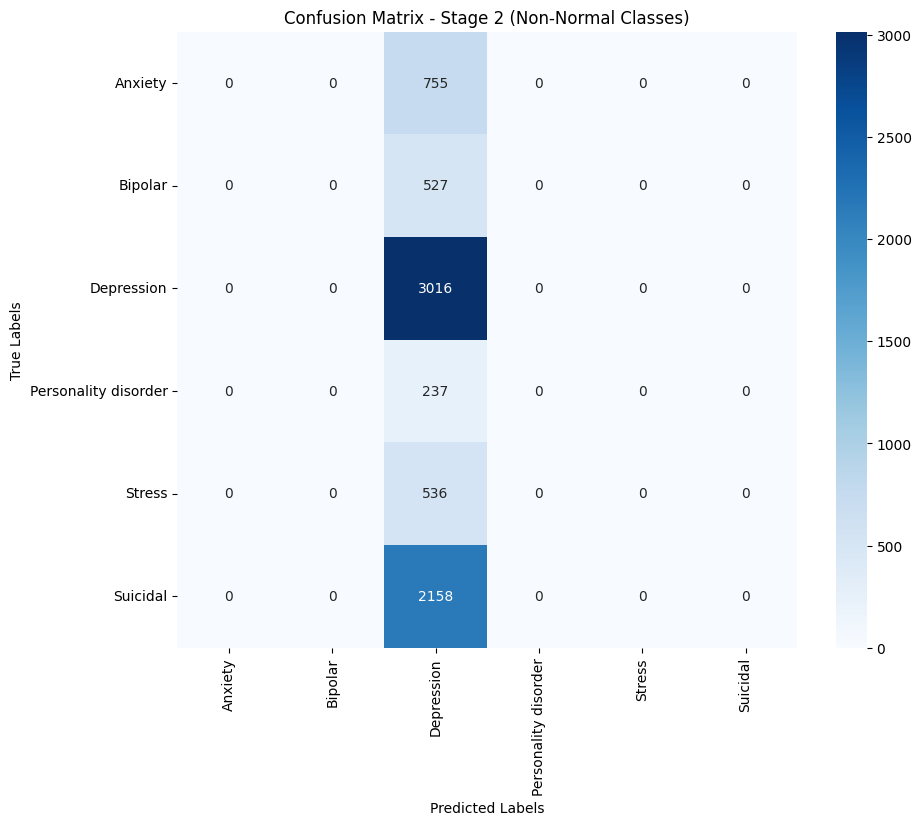

In [ ]:
# Plot heatmap for Stage 2
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_stage2, annot=True, fmt="d", cmap="Blues", xticklabels=multi_encoder.classes_, yticklabels=multi_encoder.classes_)
plt.title("Confusion Matrix - Stage 2 (Non-Normal Classes)")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


## 2.2 Neural Network  Stage 2

### Network Layers

In [ ]:
from tensorflow.keras.layers import Conv1D,LSTM, MaxPooling1D, Flatten, BatchNormalization, Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2


In [ ]:
# Define the layers in an array
layers = [

    Dense(units=64, activation='relu', input_shape=(X_train_tfidf_stage2.shape[1],),kernel_regularizer=l2(0.01)),  # Input Layer
    BatchNormalization(),
    Dropout(rate=0.3),  # Dropout Layer 1
    # Dense(units=30, activation='relu', input_shape=(X_train_tfidf_stage2.shape[1],),kernel_regularizer=l2(0.01)),  # Input Layer
    # BatchNormalization(),
    Dense(units=15, activation='relu',kernel_regularizer=l2(0.01)),  # Hidden Layer 1
    Dropout(rate=0.2),  # Dropout Layer 1
    # Dense(units=10, activation='relu',kernel_regularizer=l2(0.01)),  # Hidden Layer 2

    Dense(units=6, activation='softmax')  # Output Layer
]


# Define the updated layers
# layers = [
#     # Convolutional Layer
#     Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(X_train_tfidf_stage2.shape[1], 1)),
#     MaxPooling1D(pool_size=2),  # Pooling Layer to reduce dimensionality
#     BatchNormalization(),
#     Conv1D(filters=8, kernel_size=3, activation='relu'),
#     MaxPooling1D(pool_size=2),  # Pooling Layer to reduce dimensionality
#     BatchNormalization(),
#     Flatten(),  # Flatten the Conv1D output for the Dense layers

#     # Dense Layers
#     Dense(units=120, activation='relu', kernel_regularizer=l2(0.01)),
# #    BatchNormalization(),
#     Dropout(rate=0.3),  # Dropout Layer 1
#     Dense(units=64, activation='relu', kernel_regularizer=l2(0.01)),
#     Dropout(rate=0.2),  # Dropout Layer 2
#     Dense(units=16, activation='relu', kernel_regularizer=l2(0.01)),
#     Dense(units=6, activation='softmax')  # Output Layer
# ]

# Initialize the Sequential model
model = Sequential(layers)


# Compile the model: Using Adam optimizer, sparse categorical crossentropy loss, and accuracy as the metric
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])



### Model Train

In [ ]:

# Train the model on training data with validation on the test data
history = model.fit(X_train_tfidf_stage2.toarray(),
                    y_train_tfidf_stage2,
                    epochs=27,
                    batch_size=256,
                    validation_split=0.3
                    )


Epoch 1/27
80/80 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.3243 - loss: 2.8428 - val_accuracy: 0.4284 - val_loss: 2.1343
Epoch 2/27
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.6203 - loss: 1.6063 - val_accuracy: 0.4331 - val_loss: 1.7400
Epoch 3/27
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.6772 - loss: 1.2337 - val_accuracy: 0.4633 - val_loss: 1.5579
Epoch 4/27
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.7052 - loss: 1.0749 - val_accuracy: 0.5168 - val_loss: 1.4179
Epoch 5/27
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.7174 - loss: 0.9978 - val_accuracy: 0.5874 - val_loss: 1.2870
Epoch 6/27
80/80 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.7313 - loss: 0.9384 - val_accuracy: 0.6377 - val_loss: 1.1567
Epoch 7/27
80/80 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.7488 - loss: 0.8973 - val_accuracy: 0.6734 - val_loss: 1.0679
Epoch 8/27
80/80 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.7444 - loss: 0.8905 - val_accuracy: 0.6862 - v

In [ ]:
nn_classifier = model

### Classification Report

In [ ]:

# Make predictions on the test set
y_pred_prob = model.predict(X_test_tfidf_stage2.toarray())
y_pred = y_pred_prob.argmax(axis=1)  # Convert probabilities to class predictions

# Calculate the accuracy
accuracy_score_final = accuracy_score(y_test_multi,y_pred)
print("\n")
print("Accuracy:", accuracy_score_final)

# Compute the confusion matrix
classification_report_final =classification_report(y_test_multi, y_pred)
print(f"Overall Accuracy: {accuracy_score_final:.2f}")

print(classification_report_final)
conf_matrix_nn = confusion_matrix(y_test_multi,y_pred)

# Print classification report
print("Confusion Matrix:\n",conf_matrix_nn)


226/226 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


Accuracy: 0.6821137086733988
Overall Accuracy: 0.68
              precision    recall  f1-score   support

           0       0.78      0.80      0.79       755
           1       0.83      0.65      0.73       527
           2       0.69      0.70      0.70      3016
           3       0.65      0.52      0.58       237
           4       0.58      0.55      0.57       536
           5       0.63      0.68      0.65      2158

    accuracy                           0.68      7229
   macro avg       0.70      0.65      0.67      7229
weighted avg       0.68      0.68      0.68      7229

Confusion Matrix:
 [[ 605   11   60    9   43   27]
 [  20  342  100    6   20   39]
 [  59   35 2107   31   76  708]
 [  12    3   56  123   20   23]
 [  57    8  107    9  297   58]
 [  19   15  604   10   53 1457]]


### Heat Map

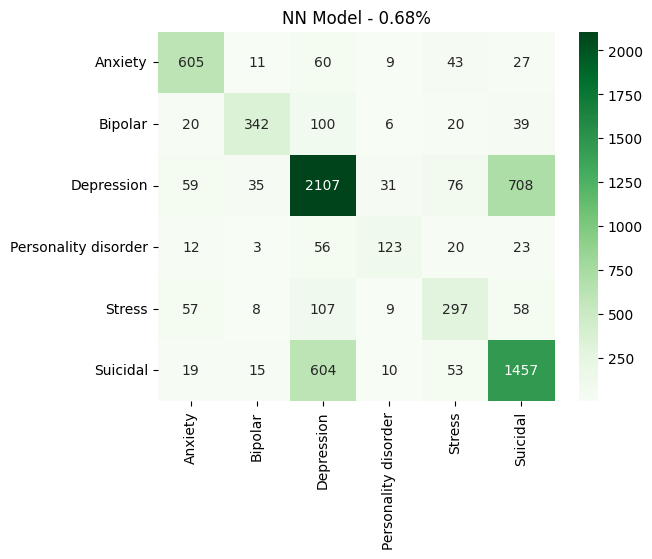

In [ ]:
ax = sns.heatmap(conf_matrix_nn, annot = True, fmt='d', cmap='Greens', xticklabels=multi_encoder.classes_, yticklabels=multi_encoder.classes_)
ax.set_title(f'NN Model - {accuracy_score_final:.2}%')
plt.show()

### Model Loss and Accuracy

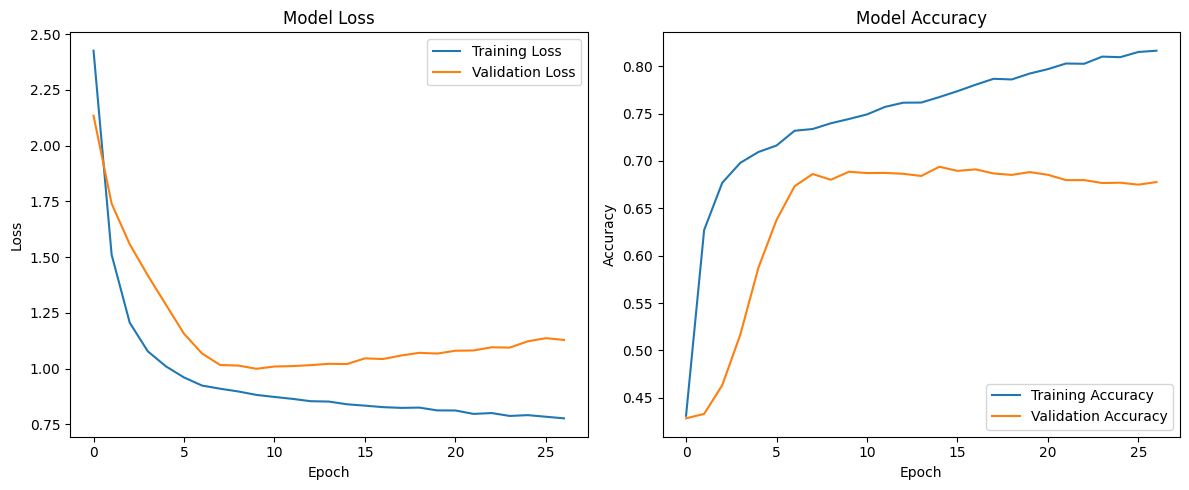

In [ ]:
plt.figure(figsize=(12, 5))

# Plot training & validation loss values
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

# Plot training & validation accuracy values
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

plt.tight_layout()  # Adjusts subplots to fit in the figure area.
plt.show()  # Display the plots

## 2.3 Best Model

choosing the best classfier for this stage

In [ ]:
multi_classifier = logistic_classifier

# ***combined Two Classifiers***

## ***3.1 Predict the test set***

### Initialize list for final predictions and true labels


In [ ]:
# Initialize list for final predictions and true labels
final_predictions = []
ground_truth = y_test.tolist()  # Convert y_test to list for easy comparison


### Iterate Over the Test Samples

In [ ]:

# Iterate through each sample in X_test
for i, test in enumerate(X_test):
    # Vectorize the text for Stage 1
    # vectorized_text_stage1 = vectorizer_stage1.transform([text])

    # Stage 1 Prediction (Binary Classification)
    stage1_prediction = binary_classifier.predict(test)[0]

    if stage1_prediction == binary_encoder.transform(['Normal'])[0]:  # If predicted as "Normal"
        final_predictions.append('Normal')
    else:
        # If predicted as "Non-Normal," vectorize for Stage 2 and predict specific condition
        # vectorized_text_stage2 = vectorizer_stage2.transform([text])
        stage2_prediction = multi_classifier.predict(test)[0]
        #stage2_prediction = model.predict(test).argmax(axis=1)

        final_predictions.append(multi_encoder.inverse_transform([stage2_prediction])[0])


## ***3.2 Classification Report***

In [ ]:
accuracy_score_final=accuracy_score(ground_truth, final_predictions)
classification_report_final =classification_report(ground_truth, final_predictions)
# Final Combined Evaluation
print("\nCombined Two-Level Classification Results")
print(f"Overall Accuracy: {accuracy_score_final:.2f}")
print(classification_report_final)



Combined Two-Level Classification Results
Overall Accuracy: 0.74
                      precision    recall  f1-score   support

             Anxiety       0.80      0.78      0.79       755
             Bipolar       0.87      0.57      0.69       527
          Depression       0.62      0.76      0.68      3016
              Normal       0.90      0.90      0.90      3308
Personality disorder       0.97      0.25      0.40       237
              Stress       0.70      0.38      0.49       536
            Suicidal       0.66      0.65      0.65      2158

            accuracy                           0.74     10537
           macro avg       0.79      0.61      0.66     10537
        weighted avg       0.75      0.74      0.74     10537



## ***3.3 Overall Heat Map***

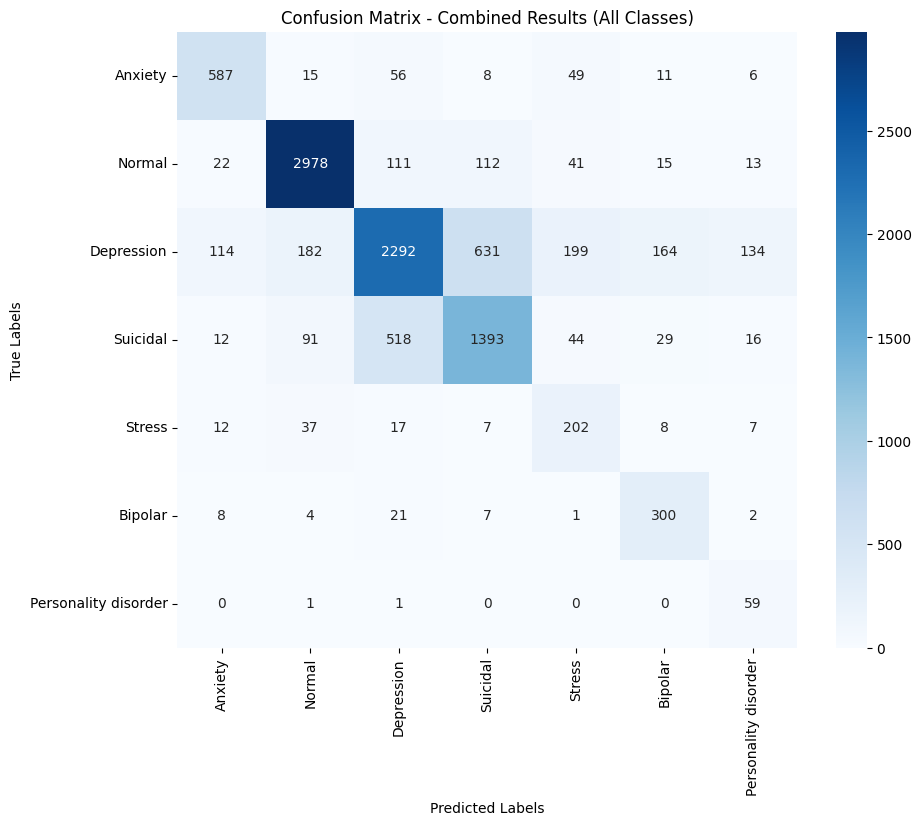

In [ ]:
# Confusion Matrix and Heatmap for Combined Results
conf_matrix_combined = confusion_matrix( final_predictions,ground_truth, labels=df['status'].unique())
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_combined, annot=True, fmt="d", cmap="Blues", xticklabels=df['status'].unique(), yticklabels=df['status'].unique())
plt.title("Confusion Matrix - Combined Results (All Classes)")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


## ***3.4 Conclusion***